<a href="https://colab.research.google.com/github/Manodnya19/Simple-linear-regression/blob/main/Simple_linear_regression_Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
#read dataset
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#Number of NA values in each column
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.shape

(4600, 18)

In [ ]:
#check data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
corr_matrix = df.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [ ]:
high_corr_pairs = corr_matrix[abs(corr_matrix) > 0.3]
high_corr_pairs = high_corr_pairs.unstack().dropna()
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1.0]
print(high_corr_pairs)


price          bathrooms        0.327110
               sqft_living      0.430410
               sqft_above       0.367570
bedrooms       bathrooms        0.545920
               sqft_living      0.594884
               sqft_above       0.484705
               sqft_basement    0.334165
bathrooms      price            0.327110
               bedrooms         0.545920
               sqft_living      0.761154
               floors           0.486428
               sqft_above       0.689918
               yr_built         0.463498
sqft_living    price            0.430410
               bedrooms         0.594884
               bathrooms        0.761154
               floors           0.344850
               view             0.311009
               sqft_above       0.876443
               sqft_basement    0.447206
floors         bathrooms        0.486428
               sqft_living      0.344850
               sqft_above       0.522814
               yr_built         0.467481
waterfront     v

In [ ]:
#normalize price and sqft_living columns as we want to use these variables to fit the model
columns_to_normalize = ['price', 'sqft_living']

In [ ]:
df_norm = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

In [ ]:
#
df[columns_to_normalize] = df_norm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
x = df['sqft_living'].values.reshape(-1, 1)
y = df['price']

In [ ]:
model = LinearRegression()

In [ ]:
scores = cross_val_score(model, x, y, cv=10)

In [ ]:
print('Average R^2:', scores.mean())

Average R^2: 0.4477151521249813


In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
y_pred = model.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
mse = mean_squared_error(y, y_pred)


In [ ]:
mse

0.00036626497425401675

In [ ]:
import matplotlib.pyplot as plt


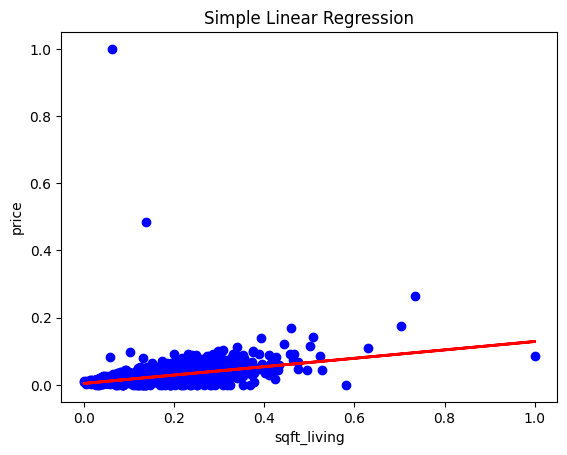

In [ ]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Simple Linear Regression')
plt.show()